In [2]:
import librosa
import subprocess
# load audio in 16kHz
signal, sr = librosa.load("./data/BASIC5000_0001.wav", sr=16000)
print(f"number of samples: {len(signal)}")
print(f"duration {len(signal)/sr} seconds")

# run Soxi to verify duration
soxi_out = subprocess.run(
    ["soxi", "-D", "./data/BASIC5000_0001.wav"],
    capture_output=True,
    text=True,
    encoding='utf-8'
)
soxi_duration = soxi_out.stdout.rstrip("\n")
print(f"duration from soxi {soxi_duration} seconds")
print(f"min value {min(signal)}")
print(f"max value {max(signal)}")

number of samples: 51040
duration 3.19 seconds
duration from soxi 3.190000 seconds
min value -0.36245694756507874
max value 0.30467501282691956


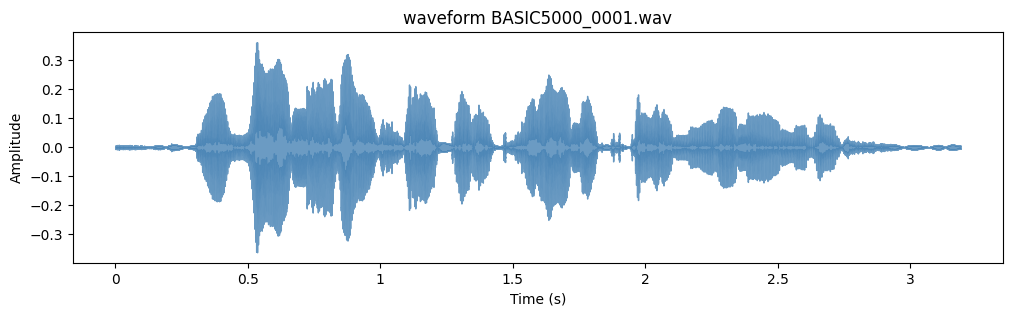

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
sr = 16000
# Load the audio file
signal, sr = librosa.load("./data/BASIC5000_0001.wav", sr=sr)
plt.figure(figsize=(12, 3))
librosa.display.waveshow(signal, sr=sr, color="steelblue", alpha=0.8)
plt.title("waveform BASIC5000_0001.wav")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [4]:
lab = []
with open("./data/BASIC5000_0001.lab") as ifile:
    for line in ifile:
        line = line.rstrip("\n")
        lab.append(line)
for l in lab[:5]:
    print(l)

0 3125000 xx^xx-sil+m=i/A:xx+xx+xx/B:xx-xx_xx/C:xx_xx+xx/D:02+xx_xx/E:xx_xx!xx_xx-xx/F:xx_xx#xx_xx@xx_xx|xx_xx/G:3_3%0_xx_xx/H:xx_xx/I:xx-xx@xx+xx&xx-xx|xx+xx/J:5_23/K:1+5-23
3125000 3525000 xx^sil-m+i=z/A:-2+1+3/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
3525000 4325000 sil^m-i+z=u/A:-2+1+3/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
4325000 5225000 m^i-z+u=o/A:-1+2+2/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23
5225000 5525000 i^z-u+o=m/A:-1+2+2/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23


In [5]:
def extract_phone_labels(lab_data):
    extracted = []
    for lab in lab_data:
        stime, etime, ph_label = lab.split()

        ph_ctxt = ph_label.split("/", 1)[0]
        ph = ph_ctxt.split("-")[1].split("+")[0]

        # 100ns -> second
        start = int(stime) * 1e-7
        end = int(etime) * 1e-7
        extracted.append((start, end, ph))
    return extracted

extracted = extract_phone_labels(lab)
for s, e, ph in extracted[:5]:
    print(s, e, ph)


0.0 0.3125 sil
0.3125 0.3525 m
0.3525 0.4325 i
0.4325 0.5225 z
0.5225 0.5525 u


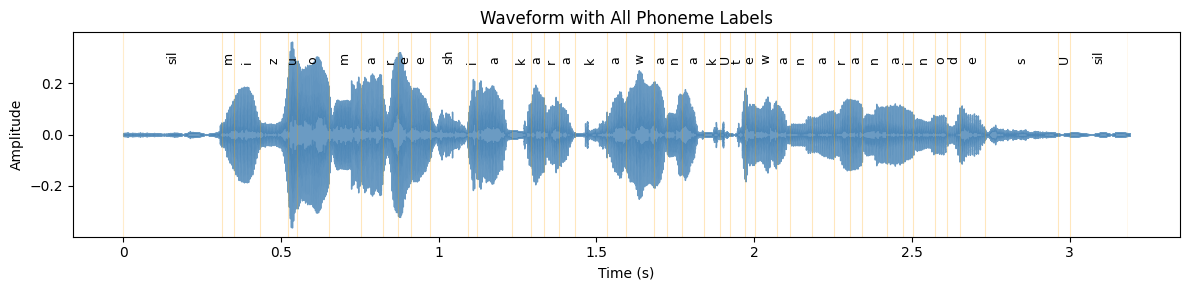

In [6]:
plt.figure(figsize=(12, 3))
librosa.display.waveshow(signal, sr=sr, color="steelblue", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform with All Phoneme Labels")

# Draw faint boundaries instead of full shaded spans
for start, end, label in extracted:
    plt.axvline(start, color="orange", alpha=0.2, linewidth=0.8)
    plt.axvline(end, color="orange", alpha=0.1, linewidth=0.5)
    plt.text(
        (start + end) / 2,
        0.9 * max(signal),
        label,
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
        rotation=90,  # vertical text saves space
    )
plt.tight_layout()
plt.show()

In [7]:
from IPython.display import Audio, display
display(Audio(signal, rate=sr))

In [8]:
# slice the signal into periods of each label
def slice_signal(signal, extracted):
    sliced = []
    for start, end, label in extracted:
        start_idx = int(start * sr)
        end_idx = int(end * sr)
        sliced.append((label, start, end, signal[start_idx:end_idx]))
    return sliced
sliced = slice_signal(signal, extracted)


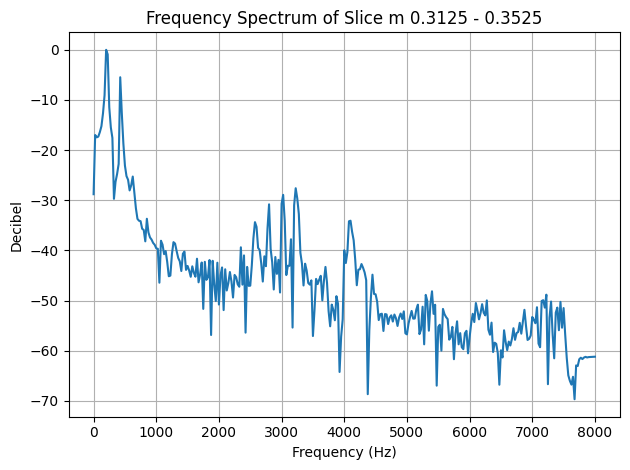

In [9]:
# Compute the spectrum (time -> frequency dimension)
import numpy as np
def wav_to_spectrum(signal, sr):
    spectrum = np.fft.rfft(signal)
    magnitude = np.abs(spectrum)
    freqs = np.fft.rfftfreq(len(signal), 1 / sr)
    spectrum = librosa.amplitude_to_db(magnitude, ref=np.max)
    return freqs, spectrum

def display_spectrum(sliced, idx):
    label, start, end, signal = sliced[idx]
    freqs, spectrum = wav_to_spectrum(signal, sr)
    plt.plot(freqs, spectrum)
    plt.title(f"Frequency Spectrum of Slice {label} {start} - {end}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Decibel")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

display_spectrum(sliced, 1)

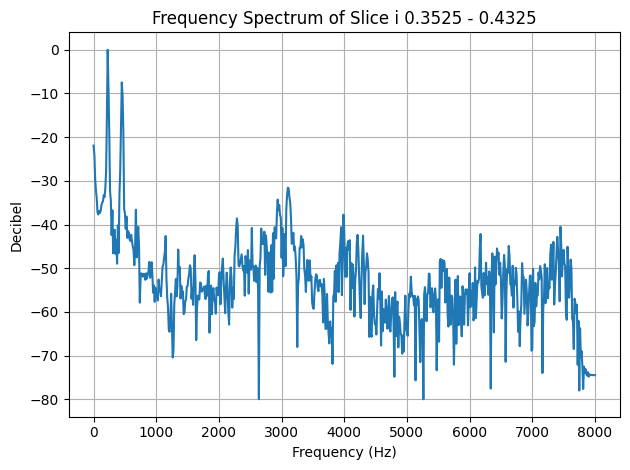

In [10]:
display_spectrum(sliced, 2)

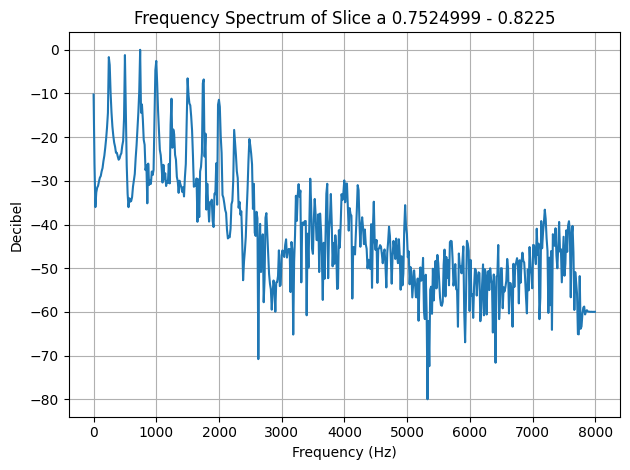

In [11]:
display_spectrum(sliced, 7)

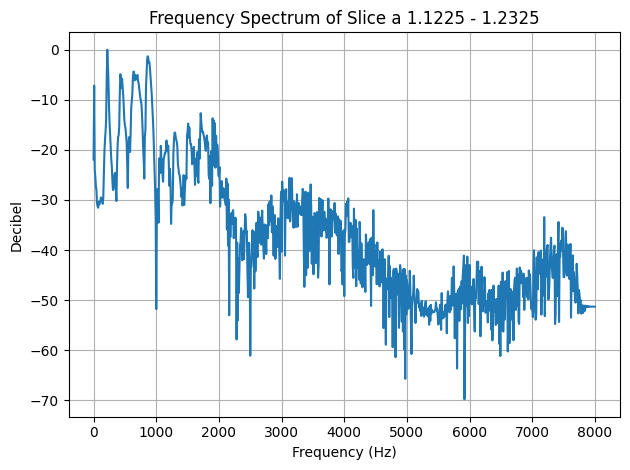

In [12]:
display_spectrum(sliced, 13)